In [1]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [33]:
import numpy as np
import sklearn
import glob
import pandas as pd

#import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
!pwd

/home/nfs/rmadaj/IDUB/dc2_oligo


In [35]:
df = pd.read_csv("results.csv", index_col=0)

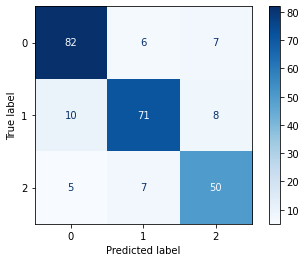

In [36]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred"], cmap='Blues')

In [37]:
confusion_matrix(df["y"], df["y_pred"])

array([[82,  6,  7],
       [10, 71,  8],
       [ 5,  7, 50]])

In [38]:
len(df)

246

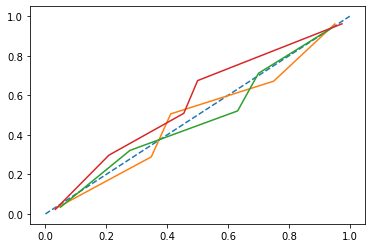

In [39]:
plt.plot([0, 1], [0, 1], linestyle='--')
for pr, i in zip(["prob_dimer", "prob_trimer", "prob_tetramer"], [0, 1, 2]):
    xc, yc = calibration_curve([1 if y_ == i else 0 for y_ in df["y"].values], df[pr].values, n_bins=5)
    plt.plot(xc, yc)

In [40]:
len(df), len(df.pdb.unique())

(246, 246)

In [41]:
!pwd

/home/nfs/rmadaj/IDUB/dc2_oligo


In [42]:
df_ref = pd.read_csv("unified_results_updated_180823.csv", index_col=0)

In [43]:
df

,pdb,cc_cov,chains,cc_sequence,full_sequence,full_seq_corr,cc_seq_corr,parallel,y,y_pred,prob_dimer,prob_trimer,prob_tetramer
0,3e7k,0.851852,4,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,SRVTFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALT...,True,False,False,2,1,0.000915,0.788365,0.210720
1,1use,0.550000,4,YSDLQRVKQELLEEVKKELQKV,SSDYSDLQRVKQELLEEVKKELQKVKEEIIEAFVQELRKR,False,False,True,2,0,0.698538,0.056970,0.244491
2,6us8,0.826087,4,LVVAASIIGILHLILWILD,DPLVVAASIIGILHLILWILDRL,True,False,True,2,2,0.000181,0.005361,0.994458
3,5kht,0.893617,2,DAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,GMDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKLVGER,False,True,True,0,0,0.977339,0.016053,0.006608
4,5c9n,0.671875,2,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,LPDLCSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQY...,True,False,True,0,0,0.983460,0.012839,0.003701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5kb1,0.888889,3,WEALEKKLAALESKCQALEKKLQALEKKHEAL,EWEALEKKLAALESKCQALEKKLQALEKKHEALEHG,False,False,True,1,1,0.004225,0.991753,0.004022
244,4h22,0.876543,2,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,EEKYKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQY...,True,False,True,0,0,0.978373,0.000017,0.021610
245,1kyc,0.800000,3,LRRRIEELERRI,EELRRRIEELERRIR,False,False,True,1,1,0.016902,0.597433,0.385665
246,2zfc,0.909091,3,LVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYI,VSGLVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYIK,False,False,True,1,1,0.020959,0.851865,0.127176


In [44]:
# df_ref["y_pred_logicoil"] = np.argmax(df_ref[['Parallel Dimer', 'Tetramer', 'Trimer', 'Antiparallel dimer']].values, axis=1)
# df_ref["y_pred_logicoil"] = df_ref["y_pred_logicoil"].apply(lambda x: x if x != 3 else 0)
df = pd.merge(df, df_ref, left_on="pdb", right_on="pdb")

In [45]:
df

,pdb,cc_cov_x,chains_x,cc_sequence_x,full_sequence,full_seq_corr,cc_seq_corr,parallel_x,y,y_pred,...,logicoil_seq,seq_length_difference,y_pred_logicoil,y_pred_dc2,y_true,ID,OligoState,parallel_y,prob_oligo_coconat,y_pred_coconat
0,3e7k,0.851852,4,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,SRVTFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALT...,True,False,False,2,1,...,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,0,2,1,2,3e7k,4.0,0.0,0.536410,2
1,1use,0.550000,4,YSDLQRVKQELLEEVKKELQKV,SSDYSDLQRVKQELLEEVKKELQKVKEEIIEAFVQELRKR,False,False,True,2,0,...,YSDLQRVKQELLEEVKKELQKV,0,0,2,2,1use,4.0,0.0,0.463654,2
2,6us8,0.826087,4,LVVAASIIGILHLILWILD,DPLVVAASIIGILHLILWILDRL,True,False,True,2,2,...,LVVAASIIGILHLILWILD,0,2,2,2,6us8,4.0,0.0,0.347972,2
3,5kht,0.893617,2,DAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,GMDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKLVGER,False,True,True,0,0,...,MDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,1,0,0,0,5kht,2.0,1.0,0.882084,0
4,5c9n,0.671875,2,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,LPDLCSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQY...,True,False,True,0,0,...,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,0,0,0,0,5c9n,2.0,1.0,0.951481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,5kb1,0.888889,3,WEALEKKLAALESKCQALEKKLQALEKKHEAL,EWEALEKKLAALESKCQALEKKLQALEKKHEALEHG,False,False,True,1,1,...,WEALEKKLAALESKCQALEKKLQALEKKHEAL,0,1,1,1,5kb1,3.0,0.0,0.487012,1
242,4h22,0.876543,2,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,EEKYKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQY...,True,False,True,0,0,...,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,0,0,0,0,4h22,2.0,1.0,0.960981,0
243,1kyc,0.800000,3,LRRRIEELERRI,EELRRRIEELERRIR,False,False,True,1,1,...,LRRRIEELERRI,0,1,1,1,1kyc,3.0,0.0,0.447140,1
244,2zfc,0.909091,3,LVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYI,VSGLVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYIK,False,False,True,1,1,...,LVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYI,0,1,1,1,2zfc,3.0,0.0,0.643462,1


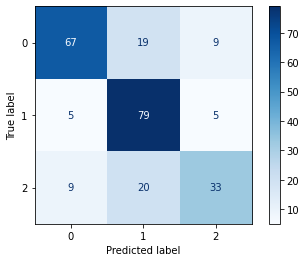

In [46]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_logicoil"], cmap='Blues')

In [47]:
f1_score(df["y"], df["y_pred"], average="macro"), f1_score(df["y"], df["y_pred_logicoil"], average="macro")

(0.8207924966749097, 0.7100510825580629)

In [27]:
df = df[df["logicoil_seq"].str.len() >= 40]

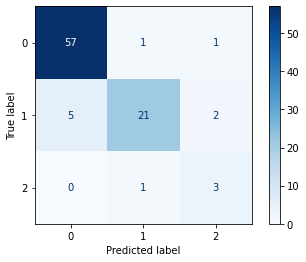

In [28]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred"], cmap='Blues')

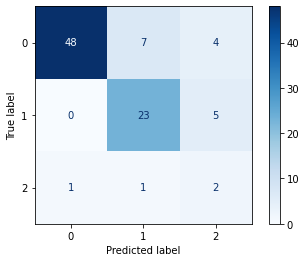

In [29]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_logicoil"], cmap='Blues')

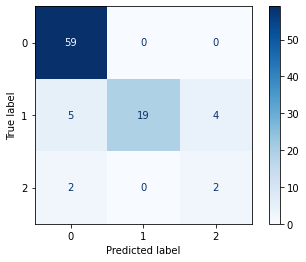

In [30]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_coconat"], cmap='Blues')

In [16]:
f1_score(df["y"], df["y_pred"], average="macro"), f1_score(df["y"], df["y_pred_logicoil"], average="macro"), f1_score(df["y"], df["y_pred_coconat"], average="macro")

(0.8281970649895177, 0.6450721908349027, 0.6413223140495868)